# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [ ]:
library(tidyverse)
dir.create("~/Rlibs", showWarnings = FALSE)
install.packages("bit", lib = "~/Rlibs")
install.packages("Rtsne", lib = "~/Rlibs", dependencies = TRUE)
install.packages("Rcpp", lib = "~/Rlibs")
install.packages("vroom", lib = "~/Rlibs")
install.packages("labeling", lib = "~/Rlibs")
install.packages("farver", lib = "~/Rlibs")
.libPaths("~/Rlibs")
library(Rtsne)
library(vroom)
library(labeling)
library(farver)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


package 'Rtsne' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ella Sharpe\AppData\Local\Temp\RtmpK2ZIjE\downloaded_packages


## Question 1  

#### a) Import your data.  
#### b) Check out the columns present using one of R's data frame summary.  
#### c) Get summary statistics on the numeric variables.  

In [4]:
wine <- read_csv("wine.csv")
glimpse(wine)
summary(wine)

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): Alcohol, Malicacid, Ash, Alcalinity_of_ash, Magnesium, Total_pheno...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 178
Columns: 14
$ Alcohol                        <dbl> 14.23, 13.20, 13.16, 14.37, 13.24, 14.2…
$ Malicacid                      <dbl> 1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.8…
$ Ash                            <dbl> 2.43, 2.14, 2.67, 2.50, 2.87, 2.45, 2.4…
$ Alcalinity_of_ash              <dbl> 15.6, 11.2, 18.6, 16.8, 21.0, 15.2, 14.…
$ Magnesium                      <dbl> 127, 100, 101, 113, 118, 112, 96, 121, …
$ Total_phenols                  <dbl> 2.80, 2.65, 2.80, 3.85, 2.80, 3.27, 2.5…
$ Flavanoids                     <dbl> 3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.5…
$ Nonflavanoid_phenols           <dbl> 0.28, 0.26, 0.30, 0.24, 0.39, 0.34, 0.3…
$ Proanthocyanins                <dbl> 2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1.9…
$ Color_intensity                <dbl> 5.64, 4.38, 5.68, 7.80, 4.32, 6.75, 5.2…
$ Hue                            <dbl> 1.04, 1.05, 1.03, 0.86, 1.04, 1.05, 1.0…
$ `0D280_0D315_of_diluted_wines` <dbl> 3.92, 3.40, 3.17, 3.45, 2.93, 2.85, 3.5…
$ Proline         

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?


In [5]:
scaled <-wine %>%
mutate(across(.cols=-class, .fns=~as.numeric(scale(.))))

Scaling and centering this data might be helpful before performing PCA because PCA displays multiple dimensions of data on the same graph, so it is more meaningful and easy to interpret when the data is on approximately the same numerical scale. Furthermore, scaling and centering the data would be helpful to determine which principal components to use because it is easier to compare proportion of variance. 

## Question 3

#### a) Perform PCA

In [13]:
wine_PCA<- prcomp(scaled)
wine_PCA
summary(prcomp(scaled))

Standard deviations (1, .., p=14):
 [1] 2.2797841 1.5802028 1.2025279 0.9608805 0.9317684 0.8131917 0.7435811
 [8] 0.5910663 0.5401830 0.5078404 0.4752135 0.4108322 0.3424757 0.2085970

Rotation (n x k) = (14 x 14):
                                      PC1          PC2           PC3
Alcohol                      -0.139554110 -0.483986584 -0.2073937774
Malicacid                     0.231278771 -0.224052306  0.0888801156
Ash                          -0.000758731 -0.315929724  0.6261495205
Alcalinity_of_ash             0.230293094  0.011263089  0.6120248225
Magnesium                    -0.131041028 -0.300236426  0.1308963493
Total_phenols                -0.372792367 -0.066404359  0.1463803150
Flavanoids                   -0.403237284  0.002017377  0.1508538950
Nonflavanoid_phenols          0.278847444 -0.027604752  0.1701277248
Proanthocyanins              -0.291925075 -0.040561908  0.1497147503
Color_intensity               0.089426322 -0.529856997 -0.1372817801
Hue                      

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2798 1.5802 1.2025 0.96088 0.93177 0.81319 0.74358
Proportion of Variance 0.3821 0.1836 0.1063 0.06789 0.06383 0.04862 0.04065
Cumulative Proportion  0.3821 0.5657 0.6721 0.73995 0.80378 0.85241 0.89306
                           PC8     PC9    PC10   PC11    PC12    PC13   PC14
Standard deviation     0.59107 0.54018 0.50784 0.4752 0.41083 0.34248 0.2086
Proportion of Variance 0.02569 0.02145 0.01896 0.0166 0.01241 0.00862 0.0032
Cumulative Proportion  0.91875 0.94020 0.95916 0.9758 0.98818 0.99680 1.0000

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

PC1 explains 38.21% of variance in the dataset. PC2 explains 18.36% of variance in the dataset. We use summary()of the PCA to see this information. 

#### c) Why are we doing PCA first?

We are doing PCA first because it allows us to choose which dimensions provide the most meaningful structure for the visualization. It is an effective way to preprocess the data. 

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

In [14]:
rotation<- solve(wine_PCA$rotation)
rotation

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
PC1,-0.13955411,0.23127877,-0.000758731,0.23029309,-0.13104103,-0.37279237,-0.403237284,0.27884744,-0.29192508,0.08942632,-0.284731497,-0.36064994,-0.27641244,0.3110235281
PC2,-0.48398658,-0.22405231,-0.315929724,0.01126309,-0.30023643,-0.06640436,0.002017377,-0.02760475,-0.04056191,-0.52985700,0.278364629,0.16336820,-0.36566189,-0.0048166342
PC3,-0.20739378,0.08888012,0.626149520,0.61202482,0.13089635,0.14638031,0.150853895,0.17012772,0.14971475,-0.13728178,0.085287218,0.16612694,-0.12670975,0.0009623389
PC4,-0.05202454,0.50792619,-0.234839101,0.06750549,-0.25528136,0.19504272,0.148853644,-0.27078415,0.43527140,0.06919472,-0.436095641,0.17104798,-0.24708206,0.0785549229
PC5,0.26128775,0.09224016,0.120560926,-0.05695664,-0.75961835,0.14215523,0.107843453,0.47058669,-0.12361143,0.05497895,0.097894204,0.12525099,0.12092559,-0.1301334861
PC6,0.16536102,0.58008658,0.125924371,-0.09534441,0.10479264,-0.12544691,-0.046749718,-0.25340042,-0.49254225,-0.42598886,0.050926361,0.23652420,0.08811233,-0.1665133820
PC7,0.08109663,-0.38986636,0.161456922,0.27494282,-0.32783323,0.03482640,0.065571524,-0.60671679,-0.40687583,0.19989161,-0.205092801,0.06766169,-0.06157391,0.0523084349
PC8,0.41085968,0.07811783,-0.171511416,0.42011625,-0.15219546,-0.38223991,-0.180723075,-0.23206171,0.35471193,-0.03762399,0.463538356,-0.07290702,0.11513687,0.0521340698
PC9,-0.48056233,0.03061612,0.286299064,-0.15910053,-0.26275246,-0.35387300,-0.072503670,-0.17571862,0.24105395,-0.06894372,-0.157966956,-0.10633712,0.56477893,-0.1111169252
PC10,0.26657031,-0.32214644,-0.081445765,0.11386621,0.10095846,-0.32340394,-0.150837960,0.23033372,0.12403042,-0.24930845,-0.523691016,0.48422273,0.04337797,-0.1638009613


#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

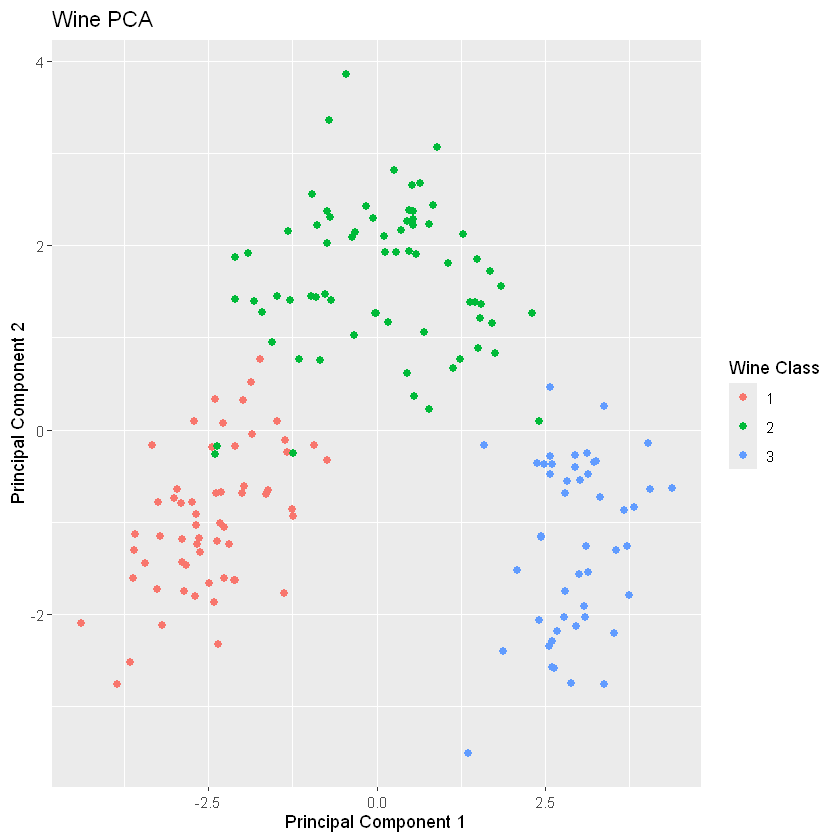

In [20]:
pca_df <- as.data.frame(wine_PCA$x) %>%
  select(PC1, PC2) %>%
  mutate(class = scaled$class)

ggplot(pca_df, aes(x = PC1, y = PC2, color = factor(class))) +
  geom_point(size = 2) +
  labs(title = "Wine PCA",
       x = "Principal Component 1",
       y = "Principal Component 2",
       color = "Wine Class")

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

PC1 seems to distinguish the three wine classes, while PC2 only distinguishes between Class 2 and the other classes. This means that you could likely distinguish the class of the wine based solely on PC1, but you may only be able to narrow it down to 2 classes if you only had PC2. 

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
*Hint:* Our notes have a few examples!

PCA would fail in a situation where the data only had one interesting degree of variation. For example, if a data set only separated two colors, the color would be the only degree of variation. Therefore, there would be no PC2 that could be used as an identifier for the data points and no second axis for the PCA. 

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.


Vector space is a flat linear space where you can add and scale vectors. Manifold is like a vector space, but it can have an additional dimension. T-SNE assumes that the vectors lie in a manifold with more dimensions, so it tries to account for that in its display of data. 

## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

In [23]:
tsne_data <- as.data.frame(wine_PCA$x) %>%
  select(PC1:PC10) %>%
  mutate(class = scaled$class) %>%
  distinct()

set.seed(123)

tsne<-Rtsne(tsne_data, dims = 2, perplexity = 30, verbose = FALSE, check_duplicates = FALSE)

#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

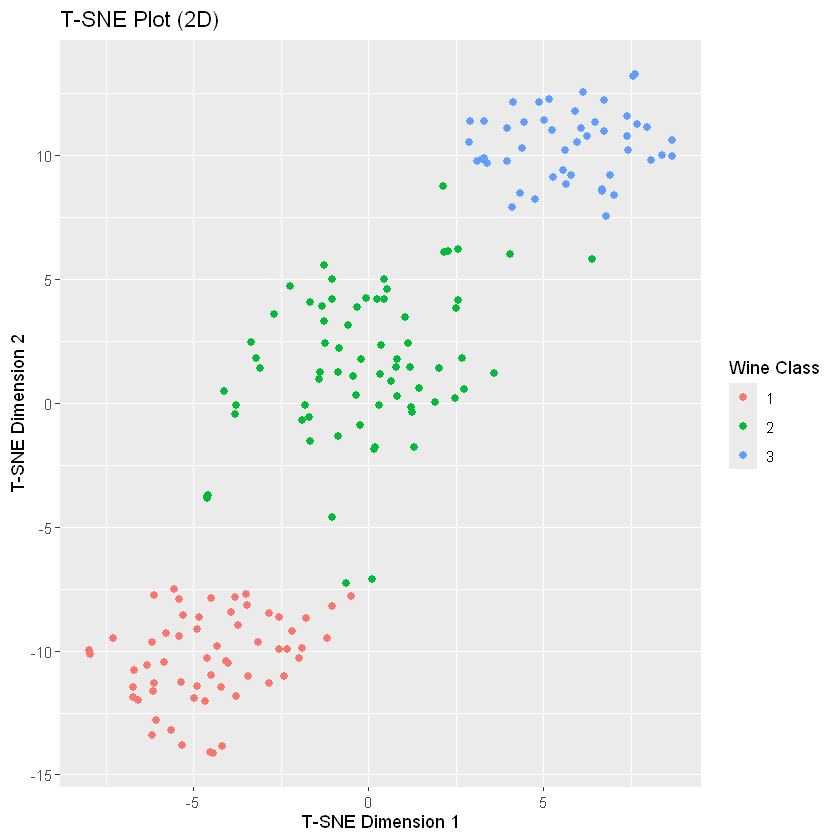

In [27]:
tsne_tibble <- as_tibble(tsne$Y) %>%
  rename(Dim1 = V1, Dim2 = V2) %>%
  mutate(class = tsne_data$class)

ggplot(tsne_tibble, aes(x = Dim1, y = Dim2, color = factor(class))) +
  geom_point(size = 2) +
  labs(title = "T-SNE Plot (2D)",
       x = "T-SNE Dimension 1",
       y = "T-SNE Dimension 2",
       color = "Wine Class")

#### c) Why didn't we stop at PCA?

We didn't stop at PCA because PCA is not as effective for making visualizations. T-SNE can also unfold the data more so that the data is separated more clearly. 

#### d) What other types of data does this workflow make sense for?



This workflow would make sense for any dataset with data that falls into categories which can be identified using a variety of other numerical factors. 